# EY Data Science Challange

Predict the last trajectory enter the area or not

In [1]:
import pandas as pd
train = pd.read_csv('y.csv',index_col='hash')
test = pd.read_csv('data_test.csv')
df = pd.read_csv('data_train.csv')

summariing other instances.

In [38]:
from utility import delta_t, create_response
df['delta_t'] = delta_t(df.time_entry,df.time_exit)
df = df.groupby('hash').mean()
df['in_area'] = create_response(df.x_entry,df.y_entry)
in_area = df.groupby('hash').sum()['in_area']
df = df.groupby('hash').mean()
df['in_area'] = in_area
df.head()

calculate 95% region and create a feature by checking if the point inside the area

In [2]:
x_1 = train[train.city_center==1].x_entry.quantile(.975)
x_2 = train[train.city_center==1].x_entry.quantile(.025)
y_1 = train[train.city_center==1].y_entry.quantile(.95)
y_2 = train[train.city_center==1].y_entry.quantile(.05)

print(x_1,x_2,y_1,y_2)

3770545.887260379 3751361.6149846464 -19206745.183734853 -19267892.408393405


In [3]:
from utility import check_entry_area
train['within_area'] = check_entry_area(train)

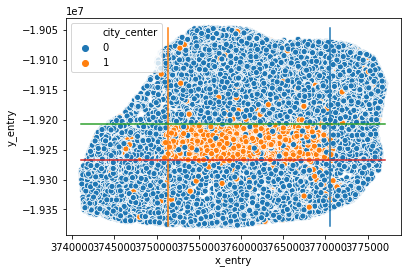

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(train.x_entry,train.y_entry,hue=train.city_center)
plt.plot([x_1,x_1],[train.y_entry.max(),train.y_entry.min()])
plt.plot([x_2,x_2],[train.y_entry.max(),train.y_entry.min()])
plt.plot([train.x_entry.max(),train.x_entry.min()],[y_1,y_1])
plt.plot([train.x_entry.max(),train.x_entry.min()],[y_2,y_2])
plt.show()

Most point is around an area before entering the city center.

In [47]:
#calculate delta_time for the last trajectory
from utility import delta_t
train['delta_time'] = delta_t(train.time_entry,train.time_exit) #travel time of the last trajecotry
train['delta_t'] = df.delta_t #average travel time
train.head()

,Unnamed: 0,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_center,within_area,delta_time,x_target,y_target,delta_dist,delta_t
hash,,,,,,,,,,,,,,,,,,
0000a8602cf2def930488dee7cdad104_1,5,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07,0,0,962.0,3.760902e+06,-1.923891e+07,0.238078,546.166667
0000cf177130469eeac79f67b6bcf3df_9,9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07,0,0,1756.0,3.760902e+06,-1.923891e+07,0.153702,439.000000
0001f97b99a80f18f62e2d44e54ef33d_3,11,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,14:34:35,15:19:51,30.167742,30.167742,30.167742,3.758738e+06,-1.937594e+07,3.769687e+06,-1.914258e+07,0,0,2716.0,3.760902e+06,-1.923891e+07,0.713536,1809.000000
0002124248b0ca510dea42824723ccac_31,20,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,NaN,NaN,NaN,3.767866e+06,-1.917797e+07,3.767866e+06,-1.917797e+07,0,0,0.0,3.760902e+06,-1.923891e+07,0.319040,142.444444
000219c2a6380c307e8bffd85b5e404b_23,28,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,NaN,NaN,NaN,3.747641e+06,-1.922695e+07,3.747641e+06,-1.922695e+07,0,0,0.0,3.760902e+06,-1.923891e+07,0.092470,456.625000


In [48]:
train['in_area'] = df.in_area
train.head()

,Unnamed: 0,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_center,within_area,delta_time,x_target,y_target,delta_dist,delta_t,in_area
hash,,,,,,,,,,,,,,,,,,,
0000a8602cf2def930488dee7cdad104_1,5,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07,0,0,962.0,3.760902e+06,-1.923891e+07,0.238078,546.166667,0
0000cf177130469eeac79f67b6bcf3df_9,9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07,0,0,1756.0,3.760902e+06,-1.923891e+07,0.153702,439.000000,0
0001f97b99a80f18f62e2d44e54ef33d_3,11,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,14:34:35,15:19:51,30.167742,30.167742,30.167742,3.758738e+06,-1.937594e+07,3.769687e+06,-1.914258e+07,0,0,2716.0,3.760902e+06,-1.923891e+07,0.713536,1809.000000,0
0002124248b0ca510dea42824723ccac_31,20,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,NaN,NaN,NaN,3.767866e+06,-1.917797e+07,3.767866e+06,-1.917797e+07,0,0,0.0,3.760902e+06,-1.923891e+07,0.319040,142.444444,0
000219c2a6380c307e8bffd85b5e404b_23,28,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,NaN,NaN,NaN,3.747641e+06,-1.922695e+07,3.747641e+06,-1.922695e+07,0,0,0.0,3.760902e+06,-1.923891e+07,0.092470,456.625000,0


# Method 1 Euclidean Distance from Center
Calculating the distance between the entry point and the center of the target area.

In [49]:
from utility import eu_dist

# the target area
x_min = 3750901.5068
x_max = 3770901.5068
y_min = -19268905.6133
y_max = -19208905.6133

# the center of target area
x_target = (x_max + x_min)/2
y_target = (y_max + y_min)/2

train = train.assign(x_target = x_target)
train = train.assign(y_target = y_target)

# calculate the euclidean 
train['delta_dist'] = eu_dist(train.x_entry,train.y_entry,train.x_target,train.y_target)
train['delta_d'] = eu_dist(df.x_entry,df.y_entry,train.x_target,train.y_target)

In [16]:
from utility import distance_from_area
train['delta_dist'] = distance_from_area(train.x_entry,train.y_entry)

In [50]:
# create a metric with distance/time
train['metric'] = train['delta_dist']/(train['delta_t']+1)

In [55]:
# normalize the variables
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train['delta_time'] =  min_max_scaler.fit_transform(train['delta_time'].values.reshape(-1,1))
train['delta_dist']= min_max_scaler.fit_transform(train['delta_dist'].values.reshape(-1,1))
train['delta_d']= min_max_scaler.fit_transform(train['delta_d'].values.reshape(-1,1))
train['delta_t']= min_max_scaler.fit_transform(train['delta_t'].values.reshape(-1,1))
train.head()

,Unnamed: 0,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,...,city_center,within_area,delta_time,x_target,y_target,delta_dist,delta_t,in_area,delta_d,metric
hash,,,,,,,,,,,,,,,,,,,,,
0000a8602cf2def930488dee7cdad104_1,5,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,3.744785e+06,...,0,0,0.050261,3.760902e+06,-1.923891e+07,0.238078,0.055925,0,0.142243,83.700242
0000cf177130469eeac79f67b6bcf3df_9,9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,...,0,0,0.091745,3.760902e+06,-1.923891e+07,0.153702,0.044952,0,0.154682,67.281784
0001f97b99a80f18f62e2d44e54ef33d_3,11,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,14:34:35,15:19:51,30.167742,30.167742,30.167742,3.758738e+06,-1.937594e+07,3.769687e+06,...,0,0,0.141902,3.760902e+06,-1.923891e+07,0.713536,0.185234,0,0.022581,75.719149
0002124248b0ca510dea42824723ccac_31,20,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,NaN,NaN,NaN,3.767866e+06,-1.917797e+07,3.767866e+06,...,0,0,0.000000,3.760902e+06,-1.923891e+07,0.319040,0.014586,0,0.221219,427.600773
000219c2a6380c307e8bffd85b5e404b_23,28,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,NaN,NaN,NaN,3.747641e+06,-1.922695e+07,3.747641e+06,...,0,0,0.000000,3.760902e+06,-1.923891e+07,0.092470,0.046757,0,0.063814,39.009637


## Resampling

In [71]:
from sklearn.utils import resample
# Separate majority and minority classes
train_majority = train[train.city_center==0]
train_minority = train[train.city_center==1]

print(train_minority.shape[0])


# downsample majority class
train_majority_downsampled = resample(train_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples= int(36380*2),     # to match minority class
                                 random_state=123)
 
# Combine majority class with upsampled minority class
train_downsampled = pd.concat([train_minority, train_majority_downsampled])
 
# Display new class counts
train_downsampled.city_center.value_counts()

36380


0    72760
1    36380
Name: city_center, dtype: int64

In [129]:
print(train.columns) #read the column names for training data set
X = train[['x_entry','y_entry','delta_time','within_area','in_area']]
# X = train_downsampled[['delta_t','delta_d','within_area','in_area','delta_time','delta_dist']]
# y = train_downsampled[['city_center']]
# X = train_downsampled[['delta_time','delta_dist','within_area','delta_t','delta_d','in_area']]
# y = train_downsampled[['city_center']]
# X = train[['delta_time','delta_dist','within_area','delta_t','delta_d','in_area']]
y = train[['city_center']]
# X = train_downsampled[['delta_t','delta_dist','metric']]
# y = train_downsampled[['city_center']]
# X = train_downsampled[['delta_t','delta_d']]

Index(['Unnamed: 0', 'trajectory_id', 'time_entry', 'time_exit', 'vmax',
       'vmin', 'vmean', 'x_entry', 'y_entry', 'x_exit', 'y_exit',
       'city_center', 'within_area', 'delta_time', 'x_target', 'y_target',
       'delta_dist', 'delta_t', 'in_area', 'delta_d', 'metric'],
      dtype='object')


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [131]:
y_test.mean()

city_center    0.269571
dtype: float64

## Modelling

In [132]:
# model training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

/Users/garylau/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7304292693842539


In [133]:
from sklearn.neighbors import KNeighborsClassifier
# for k in range(85,95,1):
neigh = KNeighborsClassifier(n_neighbors=85)
neigh.fit(X_train, y_train)
print(neigh.score(X_test,y_test))

/Users/garylau/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9249990676164547


In [134]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(10),random_state=121)
MLP.fit(X_train, y_train)
print(MLP.score(X_test,y_test))

/Users/garylau/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5156826912318652


In [135]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)
print(dtree.score(X_test,y_test))

0.9332040428150524


In [136]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate
dtree = tree.DecisionTreeClassifier()
bagging = BaggingClassifier(dtree,random_state=0)
bagging.fit(X_train, y_train)
# cross_validate(bagging,X,y,cv=10)['test_score']
print(bagging.score(X_test,y_test))

/Users/garylau/anaconda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:618: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9292507365830008


In [137]:
from sklearn.ensemble import RandomForestClassifier
rtree = RandomForestClassifier(n_estimators=10,max_depth=5)
rtree.fit(X_train,y_train)
print(rtree.score(X_test,y_test))

/Users/garylau/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.933465110207735


In [138]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('logistic', clf), ('knn', neigh), ('mlp', MLP),('dtree',dtree),('rtree',rtree)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
# print(eclf1.predict(X))
eclf1.score(X_test,y_test)

/Users/garylau/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/garylau/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9273859694924104

# Produce Result

The best result sof ar is using KNN.

In [139]:
from utility import create_response
test['in_area'] = create_response(test.x_entry,test.y_entry)
test.head()

,Unnamed: 0,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,in_area,delta_time,x_target,y_target,delta_dist,delta_t,delta_d,within_area,target
hash,,,,,,,,,,,,,,,,,,,,
00032f51796fd5437b238e3a9823d13d_31,4,traj_00032f51796fd5437b238e3a9823d13d_31_5,15:03:32,15:10:32,0.00,0.00,0.00,3.773118e+06,-1.914490e+07,3.773131e+06,-1.914465e+07,0,0.029730,3.760902e+06,-1.923891e+07,0.493849,0.029730,0.493849,0,0
000479418b5561ab694a2870cc04fd43_25,7,traj_000479418b5561ab694a2870cc04fd43_25_10,15:29:09,15:30:56,17.29,17.29,17.29,3.769978e+06,-1.934136e+07,3.769983e+06,-1.934265e+07,0,0.007574,3.760902e+06,-1.923891e+07,0.535906,0.007574,0.535906,0,0
000506a39775e5bca661ac80e3f466eb_29,10,traj_000506a39775e5bca661ac80e3f466eb_29_5,15:26:08,15:26:08,NaN,NaN,NaN,3.757468e+06,-1.923860e+07,3.755349e+06,-1.916135e+07,0,0.000000,3.760902e+06,-1.923891e+07,0.017412,0.000000,0.017412,1,1
0005401ceddaf27a9b7f0d42ef1fbe95_1,13,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,15:35:18,15:42:05,NaN,NaN,NaN,3.760505e+06,-1.935500e+07,3.751349e+06,-1.916284e+07,0,0.028810,3.760902e+06,-1.923891e+07,0.604949,0.028810,0.604949,0,0
00063a4f6c12e1e4de7d876580620667_3,17,traj_00063a4f6c12e1e4de7d876580620667_3_4,14:54:07,15:05:14,NaN,NaN,NaN,3.766319e+06,-1.917013e+07,3.766296e+06,-1.917029e+07,0,0.047215,3.760902e+06,-1.923891e+07,0.359256,0.047215,0.359256,0,0


In [140]:
test_in_area = test.groupby('hash').sum().in_area
test['delta_time'] = delta_t(test.time_entry,test.time_exit)
test = test.assign(x_target = x_target)
test = test.assign(y_target = y_target)
test['delta_dist'] = eu_dist(test.x_entry,test.y_entry,test.x_target,test.y_target)

test['delta_time'] =  min_max_scaler.fit_transform(test['delta_time'].values.reshape(-1,1))
test['delta_dist']= min_max_scaler.fit_transform(test['delta_dist'].values.reshape(-1,1))
test.head()

,Unnamed: 0,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,in_area,delta_time,x_target,y_target,delta_dist,delta_t,delta_d,within_area,target
hash,,,,,,,,,,,,,,,,,,,,
00032f51796fd5437b238e3a9823d13d_31,4,traj_00032f51796fd5437b238e3a9823d13d_31_5,15:03:32,15:10:32,0.00,0.00,0.00,3.773118e+06,-1.914490e+07,3.773131e+06,-1.914465e+07,0,0.029730,3.760902e+06,-1.923891e+07,0.493849,0.029730,0.493849,0,0
000479418b5561ab694a2870cc04fd43_25,7,traj_000479418b5561ab694a2870cc04fd43_25_10,15:29:09,15:30:56,17.29,17.29,17.29,3.769978e+06,-1.934136e+07,3.769983e+06,-1.934265e+07,0,0.007574,3.760902e+06,-1.923891e+07,0.535906,0.007574,0.535906,0,0
000506a39775e5bca661ac80e3f466eb_29,10,traj_000506a39775e5bca661ac80e3f466eb_29_5,15:26:08,15:26:08,NaN,NaN,NaN,3.757468e+06,-1.923860e+07,3.755349e+06,-1.916135e+07,0,0.000000,3.760902e+06,-1.923891e+07,0.017412,0.000000,0.017412,1,1
0005401ceddaf27a9b7f0d42ef1fbe95_1,13,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,15:35:18,15:42:05,NaN,NaN,NaN,3.760505e+06,-1.935500e+07,3.751349e+06,-1.916284e+07,0,0.028810,3.760902e+06,-1.923891e+07,0.604949,0.028810,0.604949,0,0
00063a4f6c12e1e4de7d876580620667_3,17,traj_00063a4f6c12e1e4de7d876580620667_3_4,14:54:07,15:05:14,NaN,NaN,NaN,3.766319e+06,-1.917013e+07,3.766296e+06,-1.917029e+07,0,0.047215,3.760902e+06,-1.923891e+07,0.359256,0.047215,0.359256,0,0


In [141]:
d_test = test.groupby('hash').mean()
test = test.groupby('hash').last()
test['delta_t'] = d_test.delta_time
test['delta_d'] = d_test.delta_dist
# test = test.groupby('hash').last()
test['within_area'] = check_entry_area(test)
test.head()

,Unnamed: 0,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,in_area,delta_time,x_target,y_target,delta_dist,delta_t,delta_d,within_area,target
hash,,,,,,,,,,,,,,,,,,,,
00032f51796fd5437b238e3a9823d13d_31,4,traj_00032f51796fd5437b238e3a9823d13d_31_5,15:03:32,15:10:32,0.00,0.00,0.00,3.773118e+06,-1.914490e+07,3.773131e+06,-1.914465e+07,0,0.029730,3.760902e+06,-1.923891e+07,0.493849,0.029730,0.493849,0,0
000479418b5561ab694a2870cc04fd43_25,7,traj_000479418b5561ab694a2870cc04fd43_25_10,15:29:09,15:30:56,17.29,17.29,17.29,3.769978e+06,-1.934136e+07,3.769983e+06,-1.934265e+07,0,0.007574,3.760902e+06,-1.923891e+07,0.535906,0.007574,0.535906,0,0
000506a39775e5bca661ac80e3f466eb_29,10,traj_000506a39775e5bca661ac80e3f466eb_29_5,15:26:08,15:26:08,NaN,NaN,NaN,3.757468e+06,-1.923860e+07,3.755349e+06,-1.916135e+07,0,0.000000,3.760902e+06,-1.923891e+07,0.017412,0.000000,0.017412,1,1
0005401ceddaf27a9b7f0d42ef1fbe95_1,13,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,15:35:18,15:42:05,NaN,NaN,NaN,3.760505e+06,-1.935500e+07,3.751349e+06,-1.916284e+07,0,0.028810,3.760902e+06,-1.923891e+07,0.604949,0.028810,0.604949,0,0
00063a4f6c12e1e4de7d876580620667_3,17,traj_00063a4f6c12e1e4de7d876580620667_3_4,14:54:07,15:05:14,NaN,NaN,NaN,3.766319e+06,-1.917013e+07,3.766296e+06,-1.917029e+07,0,0.047215,3.760902e+06,-1.923891e+07,0.359256,0.047215,0.359256,0,0


In [142]:
test.in_area = test_in_area
test['within_area'] = check_entry_area(test)

In [145]:
X_result = test[['x_entry','y_entry','delta_time','within_area','in_area']]
# X_result = test[['delta_time','delta_dist','within_area','delta_t','delta_d','in_area']]    
# X_result = test[['delta_time','delta_dist','within_area']]
# test['target'] = clf.predict(X_result)
# test['target'] = neigh.predict(X_result)
# test['target'] = dtree.predict(X_result)
# test['target'] = rtree.predict(X_result)
# test['target'] = bagging.predict(X_result)
test['target'] = eclf1.predict(X_result)
test.target.mean()

0.22351186036103238

In [146]:
result = test.reset_index()[['trajectory_id','target']]
result.columns = ['id','target']
result.head()

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0


In [147]:
# result[result.target ==0]= result[result.target ==0].assign(target=2)
# result.target=result.target-1

In [148]:
result.head()

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0


In [149]:
#write result as csv
result.to_csv('result.csv',sep=',')